In [27]:
import pandas as pd

In [28]:
data=pd.read_csv("building.csv")

C:\Users\mluci\AppData\Local\Temp\ipykernel_29424\676082289.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("building.csv")


In [29]:
data.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,"3,170,958","1,925",08/22/2017 12:00:00 AM,Constructed,"96,807",29.74985318,"2,100",40.0,0,0,3065220021,3065220021,Photogramm
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,"5,028,452","1,965",08/22/2017 12:00:00 AM,Constructed,"326,368",22.63,"2,100",39.0,0,0,5012640036,5012640036,Photogramm
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,"5,078,368","1,970",08/22/2017 12:00:00 AM,Constructed,"746,627",35.76,"2,100",51.0,0,0,5060190091,5060190091,Photogramm
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,"3,245,111","1,928",08/22/2017 12:00:00 AM,Constructed,"786,626",37.5,"2,100",6.0,0,0,3086910048,3086910048,Photogramm
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,"4,161,096","1,950",08/22/2017 12:00:00 AM,Constructed,"746,409",18.01511294,"2,100",93.0,0,0,4075020005,4075020005,Photogramm


In [30]:
data["the_geom"][0]

'MULTIPOLYGON (((-73.96664570466969 40.62599676998366, -73.96684846176461 40.625977490862574, -73.96685938726297 40.62604419372411, -73.96661621040211 40.62606731716107, -73.96660638332114 40.626007324369795, -73.96664680403327 40.626003480977275, -73.96664570466969 40.62599676998366)))'

In [31]:
data.shape

(1084456, 15)

In [32]:
data.dtypes

the_geom       object
NAME           object
BIN            object
CNSTRCT_YR     object
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID       object
HEIGHTROOF     object
FEAT_CODE      object
GROUNDELEV    float64
SHAPE_AREA      int64
SHAPE_LEN       int64
BASE_BBL        int64
MPLUTO_BBL      int64
GEOMSOURCE     object
dtype: object

In [33]:
data["HEIGHTROOF"] = [float(str(i).replace(",", "")) for i in data["HEIGHTROOF"]]
data.dtypes

the_geom       object
NAME           object
BIN            object
CNSTRCT_YR     object
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID       object
HEIGHTROOF    float64
FEAT_CODE      object
GROUNDELEV    float64
SHAPE_AREA      int64
SHAPE_LEN       int64
BASE_BBL        int64
MPLUTO_BBL      int64
GEOMSOURCE     object
dtype: object

In [34]:
data.describe()

,HEIGHTROOF,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,1.081760e+06,1.083918e+06,1084456.0,1084456.0,1.084456e+06,1.084456e+06
mean,2.763862e+01,5.510521e+01,0.0,0.0,3.563305e+09,3.563290e+09
std,2.162680e+01,4.152045e+01,0.0,0.0,9.859434e+08,9.859794e+08
min,0.000000e+00,-1.600000e+01,0.0,0.0,2.025280e+08,3.035390e+05
25%,1.843498e+01,2.500000e+01,0.0,0.0,3.043290e+09,3.043290e+09
50%,2.611000e+01,4.600000e+01,0.0,0.0,4.019440e+09,4.019440e+09
75%,3.111000e+01,7.400000e+01,0.0,0.0,4.106930e+09,4.106930e+09
max,1.550000e+03,5.560000e+02,0.0,0.0,6.000000e+09,6.000000e+09


In [38]:
from shapely.wkt import loads
from shapely.geometry import Polygon, MultiPolygon
data['centroid'] = None
for index, row in data.iterrows():
    multipolygon = loads(row['the_geom'])   
    for polygon in multipolygon:
        coord_list = [(coord[0], coord[1]) for coord in polygon.exterior.coords]
        poly = Polygon(coord_list)
        centroid = poly.centroid
        data.at[index, 'centroid'] = centroid

C:\Users\mluci\AppData\Local\Temp\ipykernel_29424\907550477.py:11: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in multipolygon:


In [39]:
data.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,centroid
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,"3,170,958","1,925",08/22/2017 12:00:00 AM,Constructed,"96,807",29.749853,"2,100",40.0,0,0,3065220021,3065220021,Photogramm,POINT (-73.96673414333054 40.62602275001096)
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,"5,028,452","1,965",08/22/2017 12:00:00 AM,Constructed,"326,368",22.630000,"2,100",39.0,0,0,5012640036,5012640036,Photogramm,POINT (-74.16795096615063 40.63932231255811)
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,"5,078,368","1,970",08/22/2017 12:00:00 AM,Constructed,"746,627",35.760000,"2,100",51.0,0,0,5060190091,5060190091,Photogramm,POINT (-74.19517887223672 40.55610238886468)
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,"3,245,111","1,928",08/22/2017 12:00:00 AM,Constructed,"786,626",37.500000,"2,100",6.0,0,0,3086910048,3086910048,Photogramm,POINT (-73.96116606341799 40.57741585307326)
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,"4,161,096","1,950",08/22/2017 12:00:00 AM,Constructed,"746,409",18.015113,"2,100",93.0,0,0,4075020005,4075020005,Photogramm,POINT (-73.7542850448976 40.75584435127651)


In [45]:
Geodata=data[['BIN', 'HEIGHTROOF','centroid']]

In [40]:
import geopandas as gpd
import folium

nyc = gpd.read_file('Community Districts.geojson')
nyc['boro_cd'] = nyc['boro_cd'].astype('int')
nyc.head()

,boro_cd,shape_area,shape_leng,geometry
0,404,65739662.4022,37018.3738616,"MULTIPOLYGON (((-73.84751 40.73901, -73.84801 ..."
1,304,56662612.6779,37007.8065279,"MULTIPOLYGON (((-73.89647 40.68234, -73.89653 ..."
2,303,79461502.2788,36213.671066,"MULTIPOLYGON (((-73.91805 40.68721, -73.91800 ..."
3,308,45603786.6961,38232.8870882,"MULTIPOLYGON (((-73.95829 40.67983, -73.95596 ..."
4,112,77964539.6922,54703.2247465,"MULTIPOLYGON (((-73.93445 40.83598, -73.93464 ..."


In [41]:
nyc.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [42]:
#from shapely import wkt
#data['geom'] = data['the_geom'].apply(wkt.loads)
#data.head()
#datagpd=gpd.sjoin(data,nyc,how='inner',op='within')

In [49]:
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(Geodata, crs=crs,geometry=Geodata['centroid'])

C:\Users\mluci\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [50]:
import pandas as pd
import geopandas as gp
from shapely.geometry import Point
from geopandas import GeoDataFrame
datagpd=gpd.sjoin(gdf,nyc,how='inner',op='within',lsuffix="data",rsuffix="buffer")

C:\Users\mluci\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\mluci\AppData\Local\Temp\ipykernel_29424\3123396290.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  datagpd=gpd.sjoin(gdf,nyc,how='inner',op='within',lsuffix="data",rsuffix="buffer")


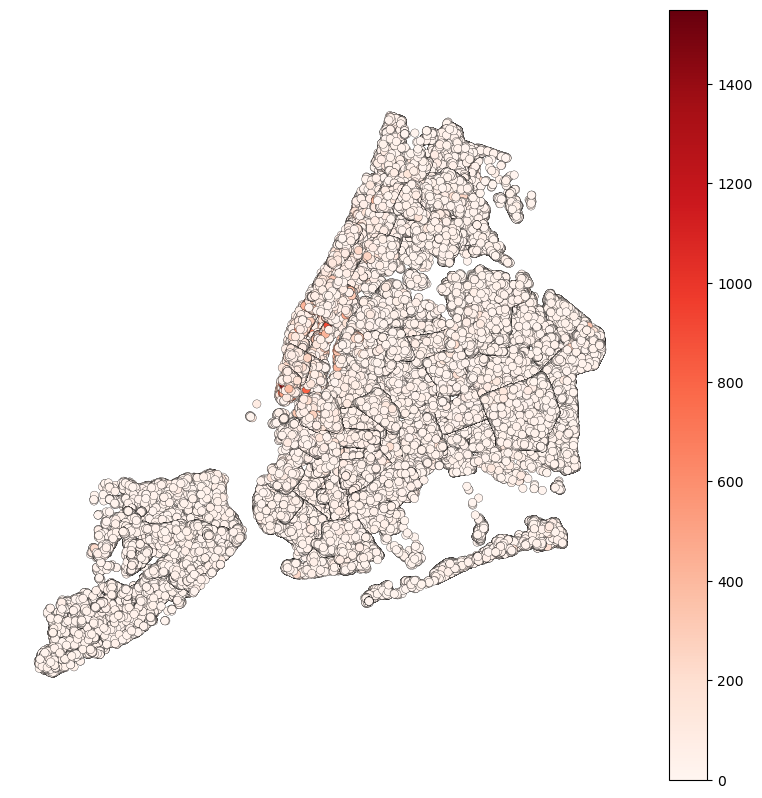

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
datagpd.plot(column='HEIGHTROOF', cmap='Reds', ax=ax, edgecolor='black', linewidth=0.2, legend=True)
ax.axis('off')
plt.show()

In [55]:
zipcode = gpd.read_file('./ZIPCODE/ZIP_CODE_040114.shp')
zipcode.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [58]:
datagpd.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [61]:
zipcode = zipcode.to_crs(epsg=4326)

In [62]:
dataZip=gpd.sjoin(datagpd,zipcode,op='within')
dataZip.head()

C:\Users\mluci\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\mluci\AppData\Local\Temp\ipykernel_29424\1027734700.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  dataZip=gpd.sjoin(datagpd,zipcode,op='within')


,BIN,HEIGHTROOF,centroid,geometry,index_buffer,boro_cd,shape_area,shape_leng,index_right,ZIPCODE,...,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN
0,"3,170,958",29.749853,POINT (-73.96673414333054 40.62602275001096),POINT (-73.96673 40.62602),29,312,99525608.2445,52245.7846153,8,11230,...,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0
49,"3,173,927",36.860000,POINT (-73.9654384433318 40.61442349705012),POINT (-73.96544 40.61442),29,312,99525608.2445,52245.7846153,8,11230,...,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0
67,"3,367,175",12.660000,POINT (-73.97040931326022 40.618799309925514),POINT (-73.97041 40.61880),29,312,99525608.2445,52245.7846153,8,11230,...,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0
167,"3,173,529",29.590000,POINT (-73.9727991976464 40.612436519494445),POINT (-73.97280 40.61244),29,312,99525608.2445,52245.7846153,8,11230,...,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0
531,"3,171,780",24.660000,POINT (-73.9680177047137 40.617336791884576),POINT (-73.96802 40.61734),29,312,99525608.2445,52245.7846153,8,11230,...,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0


In [64]:
dataZ=dataZip[['BIN','HEIGHTROOF','centroid','boro_cd','ZIPCODE','geometry']]
dataZ.head()

,BIN,HEIGHTROOF,centroid,boro_cd,ZIPCODE,geometry
0,"3,170,958",29.749853,POINT (-73.96673414333054 40.62602275001096),312,11230,POINT (-73.96673 40.62602)
49,"3,173,927",36.860000,POINT (-73.9654384433318 40.61442349705012),312,11230,POINT (-73.96544 40.61442)
67,"3,367,175",12.660000,POINT (-73.97040931326022 40.618799309925514),312,11230,POINT (-73.97041 40.61880)
167,"3,173,529",29.590000,POINT (-73.9727991976464 40.612436519494445),312,11230,POINT (-73.97280 40.61244)
531,"3,171,780",24.660000,POINT (-73.9680177047137 40.617336791884576),312,11230,POINT (-73.96802 40.61734)


In [66]:
heightperZip = dataZ.groupby(['ZIPCODE']).agg({'HEIGHTROOF':'mean'})
heightperZip.head()

,HEIGHTROOF
ZIPCODE,
00083,22.485277
10001,105.908327
10002,63.227745
10003,70.118895
10004,94.290492


In [67]:
heightGeo = zipcode.merge(heightperZip,left_on='ZIPCODE',right_on='ZIPCODE',how='left')

<AxesSubplot: >

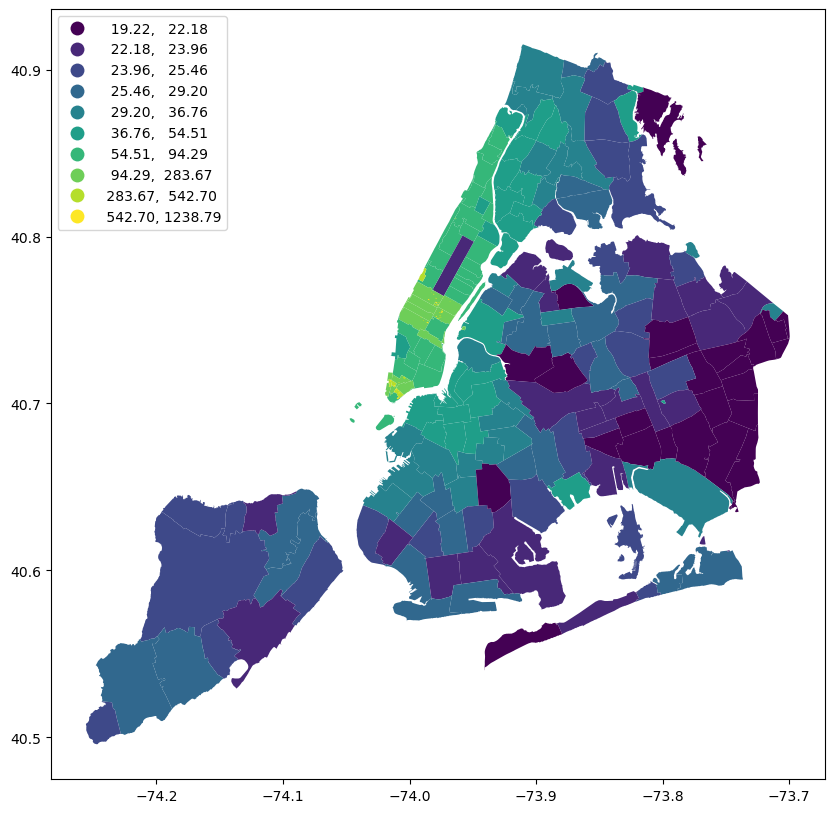

In [71]:
#plot the spatial distribution of sale price normalized by gross square feet
fig, ax = plt.subplots(1, figsize=(10,10))

heightGeo.plot(ax=ax, column='HEIGHTROOF', k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})
